**DEEP LEARNING COURSE PROJECT - IMAGE CLASSIFICATION**

**A GANESH AADHITHYA**

SCDS

email: ganeshaadhithya.a-26@scds.saiuniversity.edu.in

Dataset: Airplanes, Motorbikes & Schooners

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image

2.15.0


In [ ]:
from numpy import load

X_train_std = load('/content/drive/MyDrive/Models/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/Models/X_test_std.npy')

y_train = load('/content/drive/MyDrive/Models/y_train.npy')
y_test = load('/content/drive/MyDrive/Models/y_test.npy')

In [ ]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (459, 299, 299, 3)
X_test_std_shape: (154, 299, 299, 3)


#Model3_TransferLearning - InceptionResNetV2

In [ ]:
# Retrieveing the InceptionResNetV2 model
InceptionResNetV2=keras.applications.InceptionResNetV2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

225209952/225209952 [==============================] - 2s 0us/step


In [ ]:
#Visualizing the Model
tf.keras.utils.plot_model(
    InceptionResNetV2,
    to_file='DenseNet.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.588943 to fit



In [ ]:
# Taking only the feature extractor part
base_model3_TL = keras.applications.InceptionResNetV2(weights='imagenet',
                                                  include_top=False)
# Visualizing the extractor part for transfer learning
tf.keras.utils.plot_model(
    base_model3_TL,
    to_file='baseModel3_TL.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

219055592/219055592 [==============================] - 1s 0us/step
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.591003 to fit



In [ ]:
# Freezing the weights - will not be updated during backpropagation
for layer in base_model3_TL.layers:
  layer.trainabe = False

In [ ]:
# Adding the classifier part to the model
global_pool = keras.layers.GlobalAveragePooling2D()(base_model3_TL.output)
Drop_out = keras.layers.Dropout(rate=0.15)(global_pool)
output_ = keras.layers.Dense(units=3, activation='softmax')(Drop_out)

model3_TL = keras.models.Model(inputs=[base_model3_TL.input], outputs=[output_])

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.345775 to fit



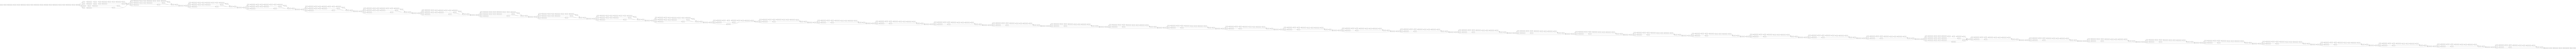

In [ ]:
# Visualizing the complete model
tf.keras.utils.plot_model(
    model3_TL,
    to_file='model3_TL.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=96
)

In [ ]:
model3_TL.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_203 (Conv2D)         (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_203 (B  (None, None, None, 32)       96        ['conv2d_203[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_203 (Activation  (None, None, None, 32)       0         ['batch_normalization_203[

In [ ]:
model3_TL.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_TL = [
             keras.callbacks.ModelCheckpoint("bestTL.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)]

history_TL = model3_TL.fit(x = X_train_std, y = y_train, epochs=10,
                          validation_split=0.1, batch_size=16, callbacks=callbacks_TL)

Epoch 1/10
26/26 [==============================] - 126s 1s/step - loss: 0.2153 - accuracy: 0.9298 - val_loss: 167.7023 - val_accuracy: 0.2391
Epoch 2/10
26/26 [==============================] - 14s 536ms/step - loss: 0.0606 - accuracy: 0.9782 - val_loss: 8565.0000 - val_accuracy: 0.0870
Epoch 3/10
26/26 [==============================] - 14s 540ms/step - loss: 0.0320 - accuracy: 0.9879 - val_loss: 77.4451 - val_accuracy: 0.0435
Epoch 4/10
26/26 [==============================] - 16s 609ms/step - loss: 0.0409 - accuracy: 0.9831 - val_loss: 3.8071 - val_accuracy: 0.5217
Epoch 5/10
26/26 [==============================] - 15s 594ms/step - loss: 0.0894 - accuracy: 0.9709 - val_loss: 0.1601 - val_accuracy: 0.9565
Epoch 6/10
26/26 [==============================] - 15s 587ms/step - loss: 0.0107 - accuracy: 0.9976 - val_loss: 0.0641 - val_accuracy: 0.9783
Epoch 7/10
26/26 [==============================] - 14s 544ms/step - loss: 0.0041 - accuracy: 0.9976 - val_loss: 0.7172 - val_accuracy: 0.

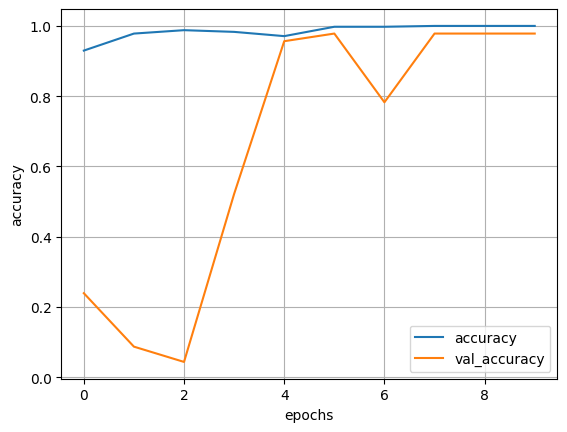

In [ ]:
#Accuracy plot for the model
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_TL.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [ ]:
testLoss_TL, testAccuracy_TL = model3_TL.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_TL, testAccuracy_TL))

5/5 [==============================] - 11s 1s/step - loss: 0.0039 - accuracy: 1.0000
Test-loss: 0.003858, Test-accuracy: 1.000000


In [ ]:
model3_TL.load_weights("bestTL.h5")
testLoss_TL, testAccuracy_TL = model3_TL.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_TL, testAccuracy_TL))

5/5 [==============================] - 2s 288ms/step - loss: 0.0562 - accuracy: 0.9805
Test-loss: 0.056222, Test-accuracy: 0.980519


In [ ]:
y_proba = model3_TL.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

5/5 [==============================] - 5s 306ms/step
[2 1 1 1 2 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1
 1 0 1 0 1 2 0 1 0 0 0 2 1 0 1 0 1 0 0 0 1 1 2 0 1 1 0 1 1 1 0 1 0 1 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 2 2 0 0 1 0 0 0 0 1 2 0 1 1 1 1 1 0 2 2 1 1 0 1 0 1
 0 1 0 1 1 0 1 0 2 1 2 0 0 0 0 0 0 0 1 1 1 1 0 2 2 1 1 1 0 2 2 1 2 1 1 0 0
 0 1 2 1 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[66,  1,  2],
       [ 0, 69,  0],
       [ 0,  0, 16]])

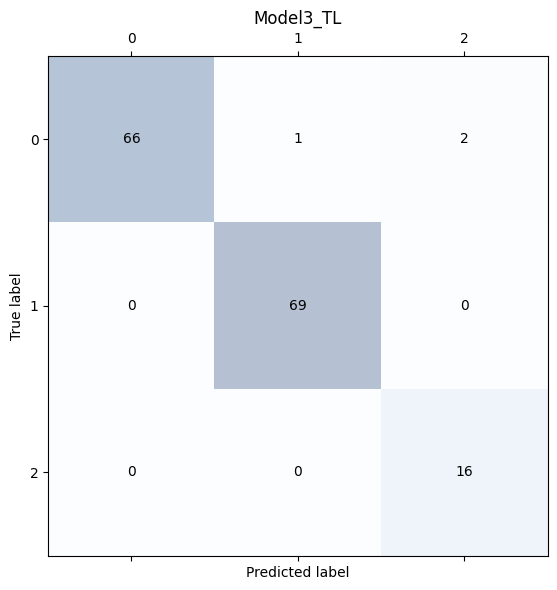

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('Model3_TL')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix_Model3_TL.png", dpi=300, format='png', pad_inches=0.3)
plt.show()


In [ ]:
# Saving the best model obtained
model3_TL.save('/content/drive/MyDrive/Models/01_InceptionResNetV2_TransferLearning_Best_Model.h5')
print("Model saved as '01_InceptionResNetV2_TransferLearning_Best_Model.h5'")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as '01_InceptionResNetV2_TransferLearning_Best_Model.h5'
